In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Quality

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(891, 12)

In [8]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
df.duplicated().sum()

0

Analysis missing values

In [11]:
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Analysis of Numerical Variables

In [13]:
df[["Age", "Fare"]].describe()


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


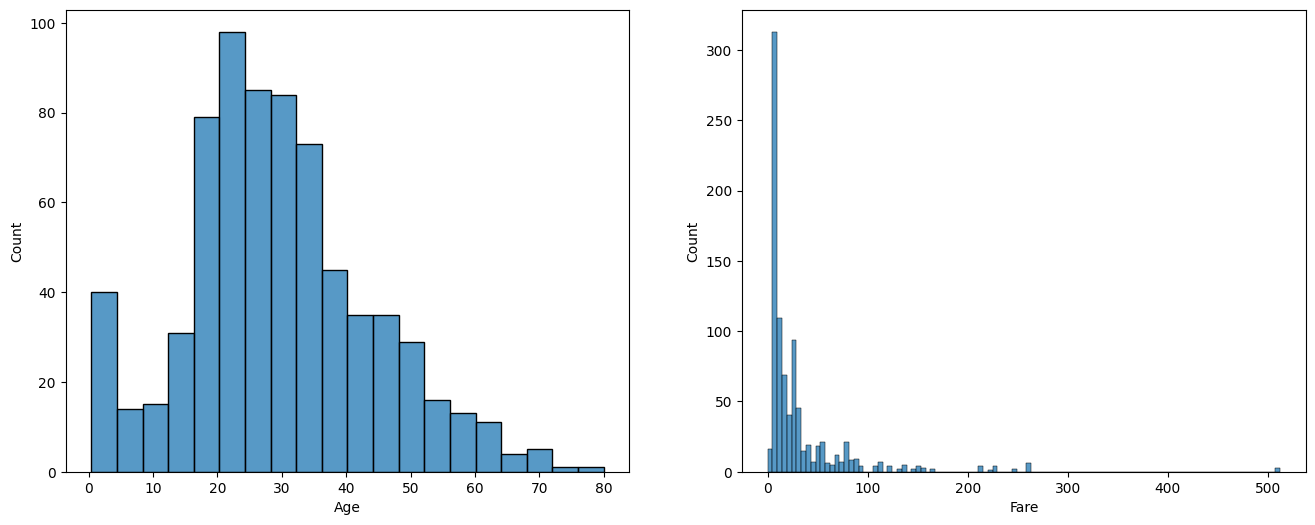

In [14]:
fig, axs = plt.subplots(1,2,figsize=(16,6), gridspec_kw={'wspace': 0.2})
sns.histplot(df['Age'], ax = axs[0])
sns.histplot(df['Fare'], ax = axs[1])
plt.show()

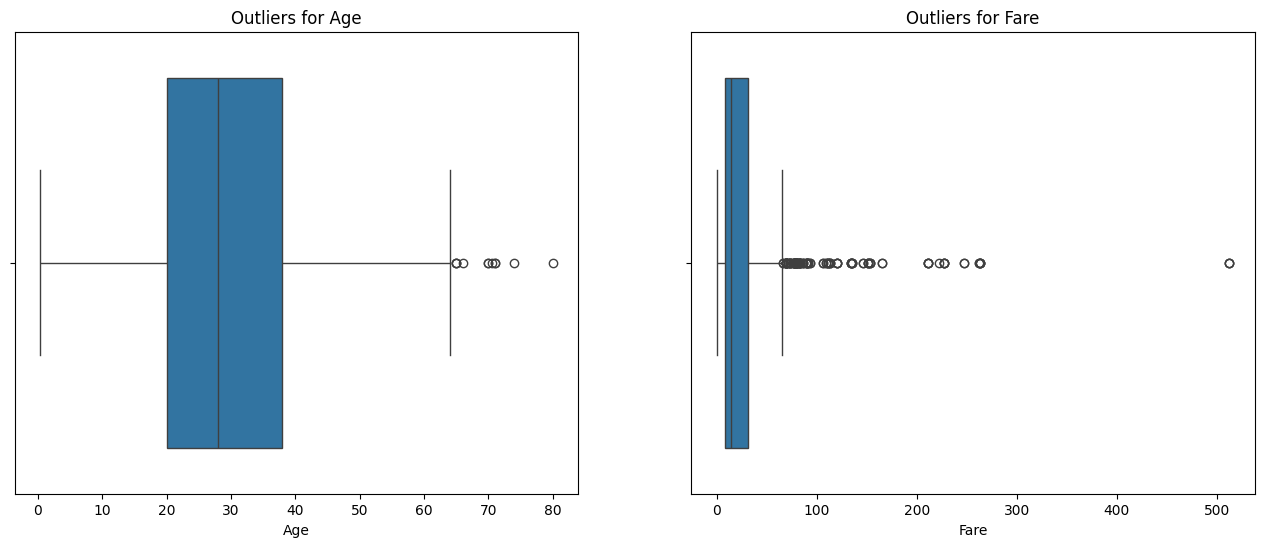

Age - Outliers: 11
Fare - Outliers: 116


In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x=df["Age"], ax=axs[0]).set(title="Outliers for Age")
sns.boxplot(x=df["Fare"], ax=axs[1]).set(title="Outliers for Fare")
plt.show()

for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} - Outliers:", outliers.shape[0])

"Age" & "Fare" contain outliers !

In [20]:
#Age
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower_extreme = Q1 - 1.5*IQR
upper_extreme = Q3 + 1.5*IQR

In [18]:
outlier_age = df[(df.Age<lower_extreme)|(df.Age>upper_extreme)]
print("the shape is:" ,outlier_age.shape)
print("-" * 20)
outlier_age.head(11)

the shape is: (11, 12)
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [19]:
# Fare:
Q1 = df.Fare.quantile(0.25)
Q3 = df.Fare.quantile(0.75)
IQR = Q3 - Q1
lower_extreme = Q1 - 1.5*IQR
upper_extreme = Q3 + 1.5*IQR
#To see rows that contain outliers uing the interquartile range (IQR) method:
outlier_Fare = df[(df.Fare<lower_extreme)|(df.Fare>upper_extreme)]
print("the shape is:",outlier_Fare.shape)
print("-" * 20)
(outlier_Fare.head())

the shape is: (116, 12)
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


Women have a higher survival rate than men.
Passengers boarding at Southampton appear to have a lower survival rate.


# Qualitative data

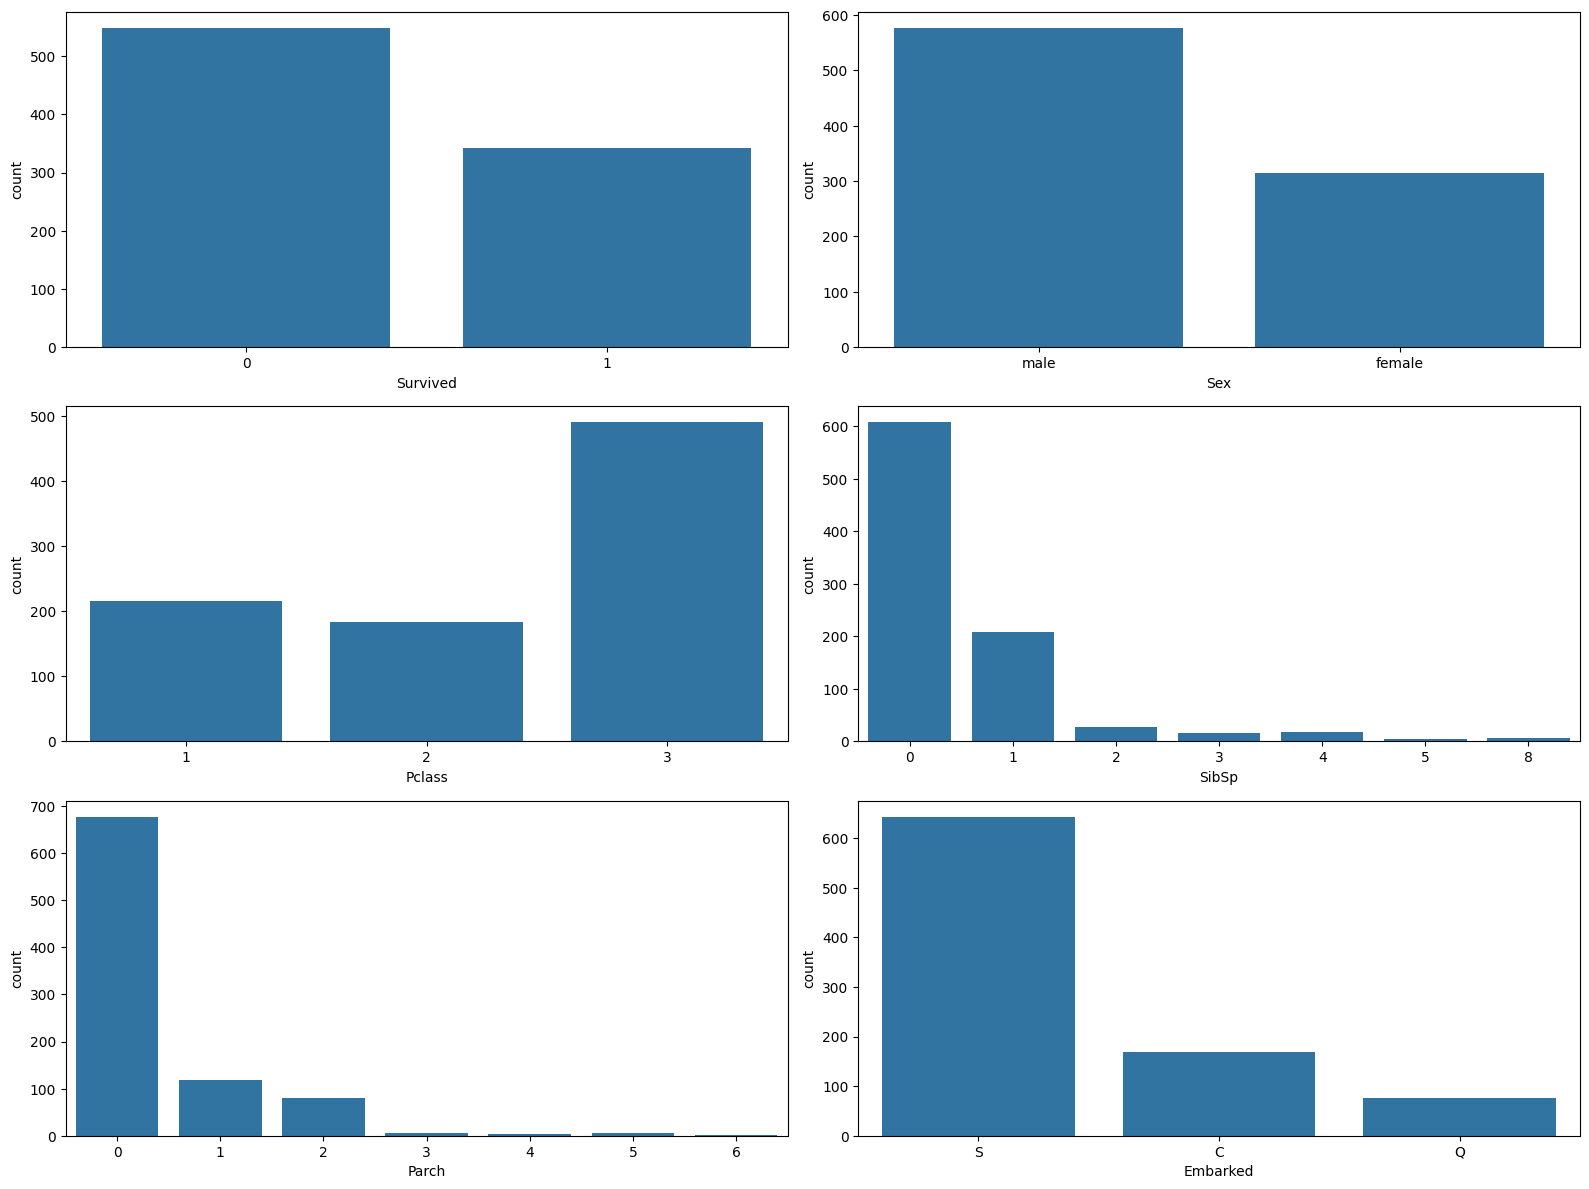

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
sns.countplot(x='Survived', data=df, ax=axs[0, 0])
sns.countplot(x='Sex', data=df, ax=axs[0, 1])
sns.countplot(x='Pclass', data=df, ax=axs[1, 0])
sns.countplot(x='SibSp', data=df, ax=axs[1, 1])
sns.countplot(x='Parch', data=df, ax=axs[2, 0])
sns.countplot(x='Embarked', data=df, ax=axs[2, 1])
plt.tight_layout()
plt.show()


/var/folders/dg/pj5fhv9d5mz6g54d0l31b3jh0000gp/T/ipykernel_72554/2193625806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data = df, palette = 'tab10', ax = axs[0])
/var/folders/dg/pj5fhv9d5mz6g54d0l31b3jh0000gp/T/ipykernel_72554/2193625806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data = df, palette = 'tab10', ax = axs[1])


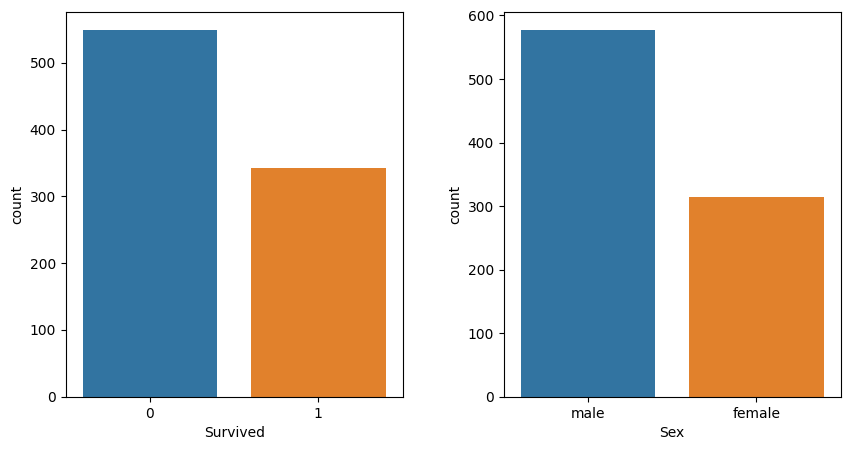

In [21]:
#  "Survived" and "Sex"
fig, axs = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'wspace': 0.3})
sns.countplot(x='Survived', data = df, palette = 'tab10', ax = axs[0])
sns.countplot(x='Sex', data = df, palette = 'tab10', ax = axs[1])
plt.show()

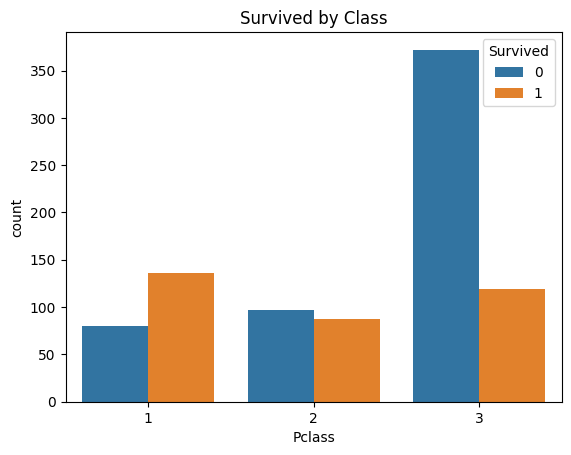

In [35]:
# Class-based survival analysis
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survived by Class")
plt.show()

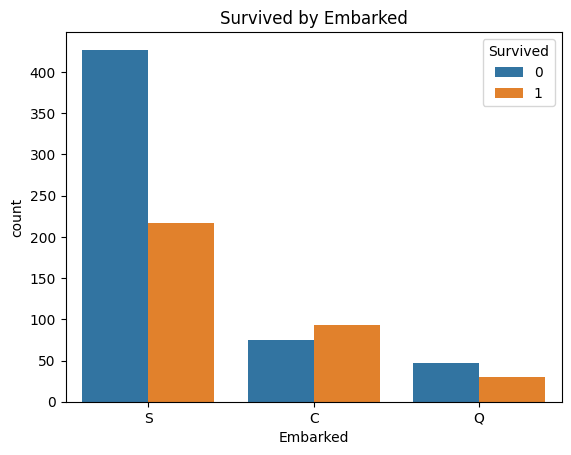

In [36]:
# Embarkation port-based survival analysis
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survived by Embarked")
plt.show()

Survival crosstab by class and gender :n Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891


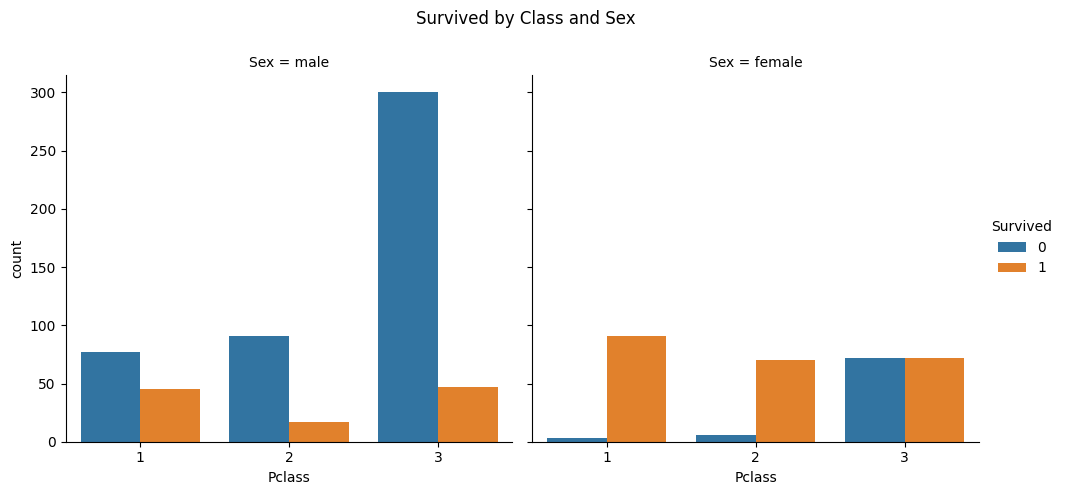

In [39]:
survival_cross_tab = pd.crosstab(index=[df["Pclass"], df["Sex"]], columns=df["Survived"], margins=True)
print('Survival crosstab by class and gender :n', survival_cross_tab)

sns.catplot(x='Pclass', hue='Survived', col='Sex', data=df, kind='count', height=5)
plt.subplots_adjust(top=0.85)
plt.suptitle("Survived by Class and Sex")
plt.show()

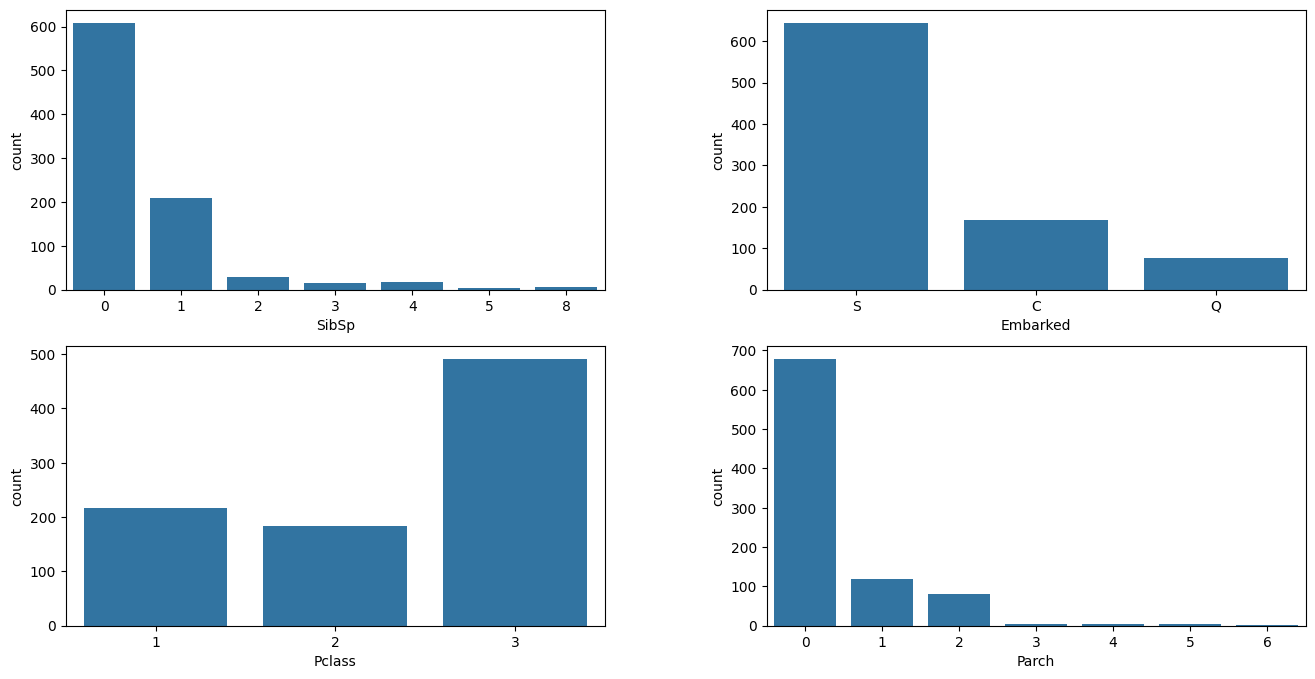

In [22]:
# "SibSp", "Embarked", "Pclass" and "Parch"
fig, axs = plt.subplots(2,2,figsize=(16,8), gridspec_kw={'wspace': 0.3})
sns.countplot(x= 'SibSp',data = df,  ax = axs[0,0])
sns.countplot(x='Embarked', data=df, ax = axs[0,1])
sns.countplot(x='Pclass', data=df, ax=axs[1, 0])  
sns.countplot(x='Parch', data = df, ax=axs[1, 1])
plt.show() 

In [23]:
pd.DataFrame(df.groupby(['Sex','Survived'])['Survived'].count())


Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

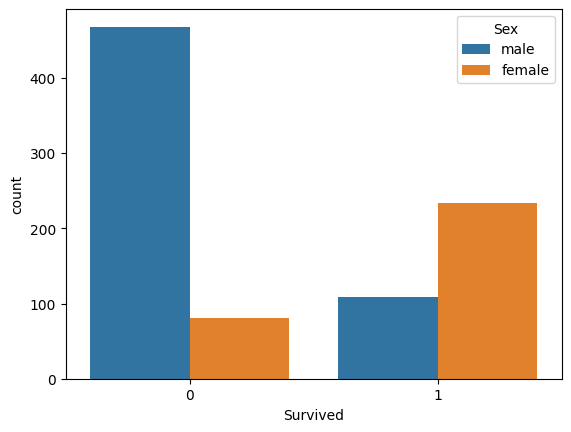

In [24]:
sns.countplot(x = "Survived", hue = "Sex", data = df)
plt.show()

In [25]:
pd.DataFrame(df.groupby(['Pclass','Survived'])['Survived'].count())


Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

<Axes: xlabel='Pclass', ylabel='count'>

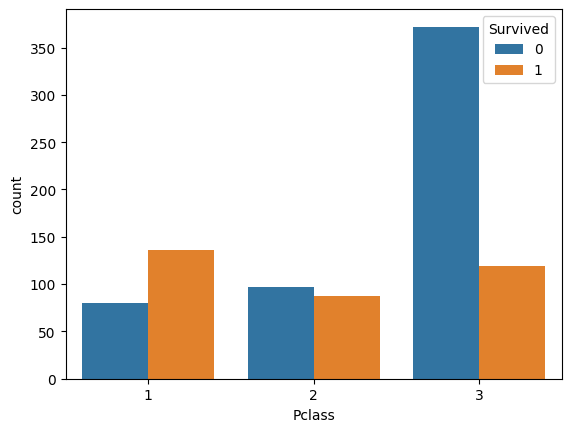

In [26]:
sns.countplot(x='Pclass', hue = "Survived",data=df)


In [27]:
pd.DataFrame(df.groupby(['Embarked','Survived'])['Survived'].count())


Survived
Embarked Survived          
C        0               75
         1               93
Q        0               47
         1               30
S        0              427
         1              217

<Axes: xlabel='Embarked', ylabel='count'>

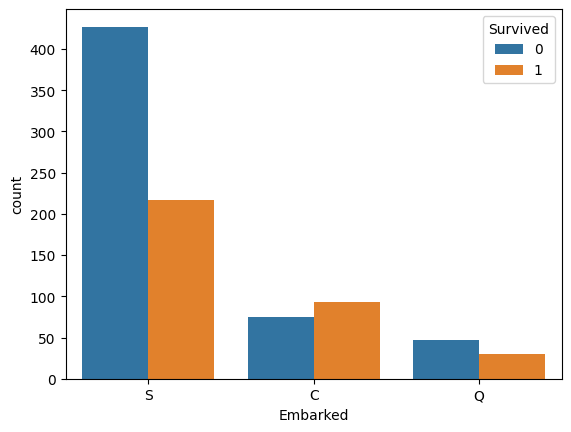

In [28]:
sns.countplot(x='Embarked', hue = "Survived",data=df)


In [30]:
pd.DataFrame(df.groupby(['Pclass','Sex', 'Survived'])['Survived'].count())


Survived
Pclass Sex    Survived          
1      female 0                3
              1               91
       male   0               77
              1               45
2      female 0                6
              1               70
       male   0               91
              1               17
3      female 0               72
              1               72
       male   0              300
              1               47

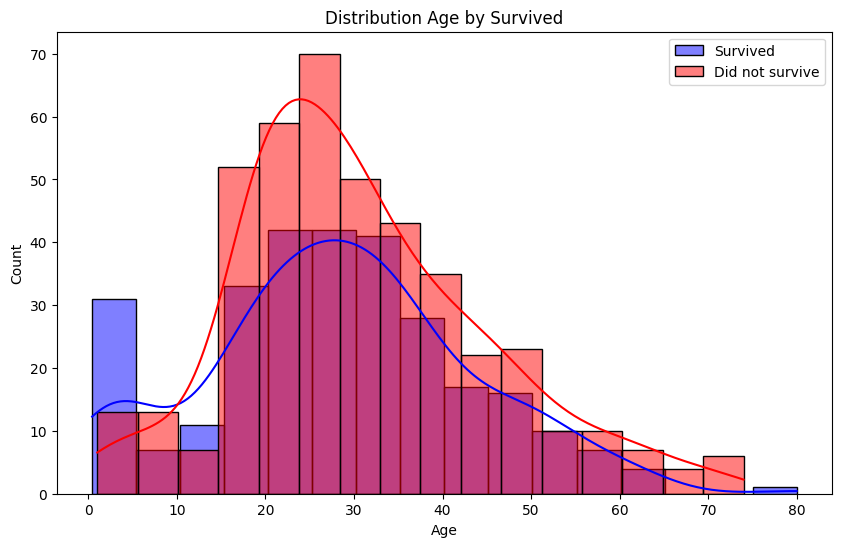

In [41]:
# Plot age distribution of survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='blue', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Did not survive')
plt.legend()
plt.title("Distribution Age by Survived")
plt.show()


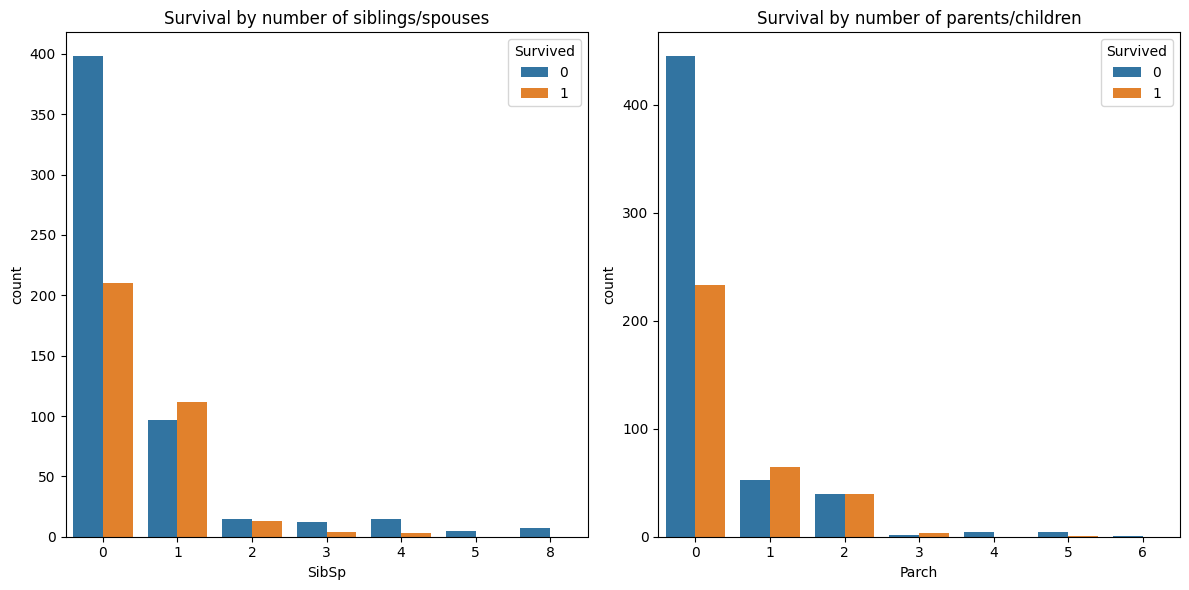

In [45]:
# Survival rate by number of siblings/spouses and parents/children
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp', hue='Survived', data=df, ax=axs[0])
axs[0].set_title("Survival by number of siblings/spouses")
sns.countplot(x='Parch', hue='Survived', data=df, ax=axs[1])
axs[1].set_title("Survival by number of parents/children")
plt.tight_layout()
plt.show()

So we can see that it was logically easier to survive alone or in a small group! Whereas a large family was almost certain to die.


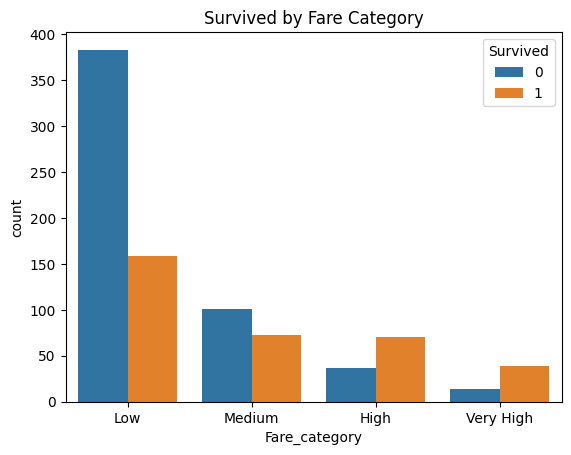

In [48]:
# Survival based on Fare ranges
df['Fare_category'] = pd.cut(df['Fare'], bins=[0, 25, 50, 100, 600], labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(x='Fare_category', hue='Survived', data=df)
plt.title("Survived by Fare Category")
plt.show()


Super interesting, but not very visual, because we get the impression that the lower the price, the more survivors. Let's put it into percentages !

/var/folders/dg/pj5fhv9d5mz6g54d0l31b3jh0000gp/T/ipykernel_72554/3174870744.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby(['Fare_category', 'Survived']).size().unstack()


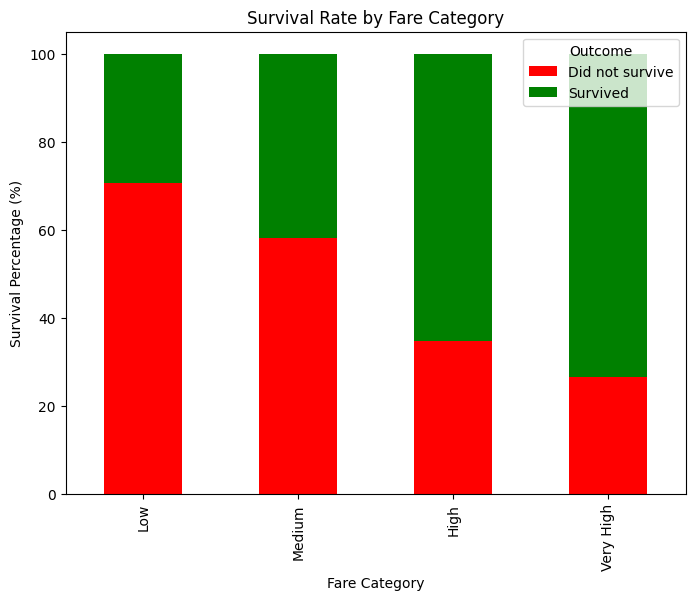

In [47]:
df['Fare_category'] = pd.cut(df['Fare'], bins=[0, 25, 50, 100, 600], labels=['Low', 'Medium', 'High', 'Very High'])

fare_survival = df.groupby(['Fare_category', 'Survived']).size().unstack()
fare_survival_percentage = fare_survival.div(fare_survival.sum(axis=1), axis=0) * 100

# Plotting the survival percentage by fare category
fare_survival_percentage.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.title("Survival Rate by Fare Category")
plt.xlabel("Fare Category")
plt.ylabel("Survival Percentage (%)")
plt.legend(['Did not survive', 'Survived'], title="Outcome")
plt.show()


So we can see that the more expensive the ticket, the more survivors there are!


# Limitations

1. Data Quality and Missing Values
Missing Data: There are missing values in the "Age," "Cabin," and "Embarked" columns. While we can impute some values (e.g., mean, median for "Age"), these imputations can introduce bias, as the actual values might have different patterns that we can't account for.
Unknown Cabins: The "Cabin" feature has a high rate of missing values, so any analysis on this attribute might not be reliable without a substantial amount of data imputation, which could affect the accuracy.
2. Historical Context
Behavioral Assumptions: The data reflects social behaviors and norms from over a century ago, which may not align with present-day behavior or priorities. Assumptions about the importance of "women and children first" might not apply universally across similar data today, making it difficult to generalize these findings.
3. Outliers and Skewed Distributions
Outliers in Fare and Age: Extreme values in both "Fare" and "Age" can skew insights, especially if they represent exceptional cases or errors in data entry. These may need to be removed or handled differently, depending on the approach, to avoid misleading interpretations.
4. Statistical Generalizability
Sample Size: With 891 observations, this is a relatively small sample, which may impact the reliability of findings, particularly for segmented or grouped analyses (e.g., by class and sex).
5. Causal Inference Limitations
Correlation, not Causation: Observing that certain variables (like fare or class) correlate with survival doesn’t mean they directly cause it. There may be confounding variables (e.g., physical proximity to lifeboats) that we cannot measure but might influence survival.
